# Principles of Data Analytics Iris Dataset Assignement

# Author: Michal Gondek

# Task 1: Source the Data Set

Import the Iris data set from the sklearn.datasets module.
Explain, in your own words, what the load_iris() function returns.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

In [29]:
# Load the Iris Data set
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

# I will use df.pd.DataFrame(data) to make the data clear and more easy to read
# Reference:https://www.w3schools.com/python/pandas/pandas_dataframe

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target


# The Iris data set loaded from sklearn.datasets is used to study the relationship between flower measurements and their species. 
# It helps us determine which species a flower belongs to, based on the size of its petals and sepals.
# There are 3 species of the Iris flower: 1.Setosa 2.Versicolor 3.Virginica
# Each sample has 4 measurements: 1.Sepal Lenght 2.Sepal Width 3.Petal Length 4.Petal Width
# The main use for this data set is to predict a species of Iris Flower just from using its measurements

# Task 2: Explore the Data Structure

Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [30]:
print('DataSet Overview:')
print("-------------------")
print(f'Total Samples: {df.shape[0]}')
print("-------------------")
print(f'Total Features: {df.shape[1]}')
print("-------------------")
print('First Rows:')
print("------------------------------------------------------------------------------")
print(df.head())
print("------------------------------------------------------------------------------")
print(df.tail())
print("-------------------")

for name in iris.feature_names:
    print(f'-{name}')
    ("-------------------")
print ('Target:')
print("-------------------")
for i, name in enumerate(iris.target_names):
    print(f'Class {i}: {name}')
    print("-------------------")  


DataSet Overview:
-------------------
Total Samples: 150
-------------------
Total Features: 5
-------------------
First Rows:
------------------------------------------------------------------------------
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
------------------------------------------------------------------------------
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
146   

# Task 3: Summarize the Data

For each feature in the dataset, calculate and display:

mean
minimum
maximum
standard deviation
median


In [31]:
print("Summary of Features")
print("-------------------------")
for feature in iris.feature_names:
        data = df[feature]
#       Average value
        mean = round(data.mean(), 2) 
#       Smallest value     
        min_val = round(data.min(), 2)
#       Largest value    
        max_val = round(data.max(), 2) 
#       Standard deviation   
        std_dev = round(data.std(), 2)  
#       Median value
        median = round(data.median(), 2) 

        print(f"{feature}\t|")
        print(f" Mean: {mean}\t\t|")
        print(f" Min: {min_val}\t\t|")
        print(f" Max: {max_val}\t\t|")
        print(f" Std Dev: {std_dev}\t\t|")
        print(f" Median: {median}\t\t|")
        print("-------------------------")



Summary of Features
-------------------------
sepal length (cm)	|
 Mean: 5.84		|
 Min: 4.3		|
 Max: 7.9		|
 Std Dev: 0.83		|
 Median: 5.8		|
-------------------------
sepal width (cm)	|
 Mean: 3.06		|
 Min: 2.0		|
 Max: 4.4		|
 Std Dev: 0.44		|
 Median: 3.0		|
-------------------------
petal length (cm)	|
 Mean: 3.76		|
 Min: 1.0		|
 Max: 6.9		|
 Std Dev: 1.77		|
 Median: 4.35		|
-------------------------
petal width (cm)	|
 Mean: 1.2		|
 Min: 0.1		|
 Max: 2.5		|
 Std Dev: 0.76		|
 Median: 1.3		|
-------------------------


# Task 4: Visualize Features

Plot histograms for each feature using matplotlib.
Add appropriate titles and axis labels.

Reference: https://www.w3schools.com/python/matplotlib_pyplot.asp

In [32]:
for feature in iris.feature_names:
    plt.figure()
    plt.hist(df[feature],bins=10, color='green', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'hist_{feature.replace(' ','_')}.png')
    plt.close()
    

# Task 5: Investigate Relationships

Choose any two features from the data set and create a scatter plot of them.

Color-code the three different classes of the scatter plot points.


Reference: https://www.w3schools.com/python/matplotlib_scatter.asp

In [33]:

x_label = iris.feature_names[0]
y_label = iris.feature_names[1]
plt.figure()
for target_value, target_name in enumerate(iris.target_names):
    subset = df[df['target'] == target_value]
    plt.scatter(subset[x_label], subset[y_label], label=target_name)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'{x_label} vs {y_label}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('scatter_plot.png')
plt.close()


# Task 6: Analyze Relationship

Use numpy.polyfit to add a regression line to the scatter plot from Task 5.


Reference: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [34]:

x_label = iris.feature_names[0] 
y_label = iris.feature_names[1]  

x = df[x_label]
y = df[y_label]

m,c = np.polyfit(x, y, 1)

plt.figure()
for target_value, target_name in enumerate(iris.target_names):
    subset = df[df['target'] == target_value]
    plt.scatter(subset[x_label], subset[y_label], label=target_name)

plt.plot(x, m* x + c, color='red', label='Regression Line')

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(f'{x_label} vs {y_label}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('regression_line.png')
plt.close()

# Task 7: Analyze Class Distributions

Create box-plots of the petal lengths for each of the three classes.


Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

Reference: https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/

In [35]:
plt.figure()
sns.boxplot(x='target', y='petal length (cm)', data=df)
plt.title('Box Plot Petal By Class')
plt.xlabel('Iris Class')
plt.ylabel('petal length (cm)')
plt.tight_layout()
plt.savefig('boxplot_petal.png')
plt.close()

# Task 8: Compute Correlations 

Calculate the correlation coefficients between the features.

Display the results as a heatmap using matplotlib.


Reference: https://realpython.com/numpy-scipy-pandas-correlation-python/

Reference: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

In [36]:

correlation_matrix = df[iris.feature_names].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap')
plt.tight_layout()
plt.savefig('Heatmap.png')
plt.close()

# Task 9: Fit a Simple Linear Regression

For your two features in Task 5, calculate the coefficient of determination R2
Re-create the plot from Task 6 and annotate it with the R2 value


Reference:https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

Reference:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

x_reshape = x.values.reshape(-1,1)
y_reshape = y.values.reshape(-1,1)
model.fit(x_reshape, y_reshape)
predicted = model.predict(x_reshape)
r2 = r2_score(y, predicted)

plt.figure()
plt.scatter(x,y, label='Data', color='blue',edgecolor='black')
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title('Linear Regression with R2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('linear_regression.png')
plt.close()


# Task 10: Too Many Features

Use seaborn to create a pairplot of the data set.

Explain, in your own words, what the pairplot depicts.

Reference: https://www.w3schools.com/python/numpy/numpy_random_seaborn.asp

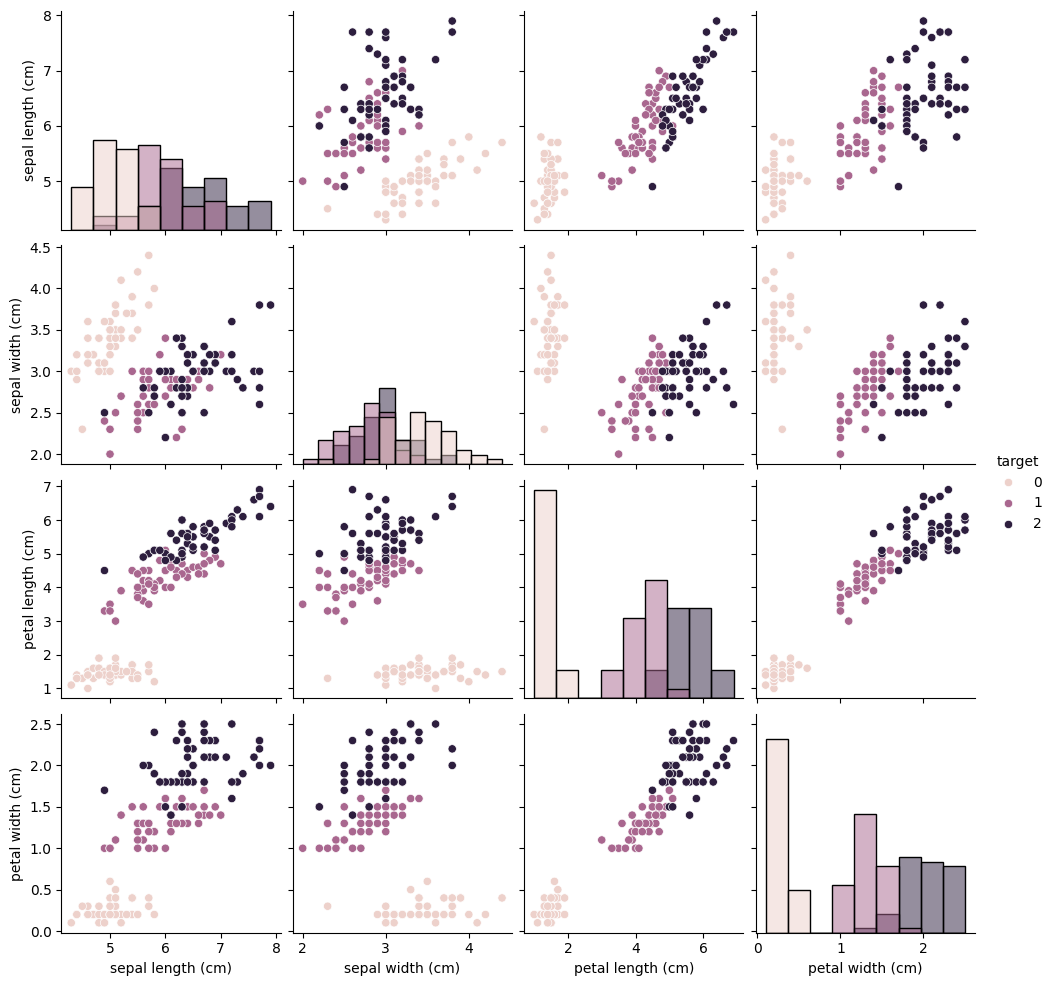

In [38]:
sns.pairplot(df, hue='target', diag_kind='hist')
plt.savefig('pairplot.png')

The pairplot shows scatter plots for each pair of features grouped by class.

The diagonal axis shows histogram of each individual feature.

This helps identify correlations and class sepeerations visually.

## End